# 텐서플로우를 이용한 분류분석

In [1]:
import tensorflow as tf    # 구글이 제공하는 인공지능 관련 함수가 제공되는 텐서2.0으로 세팅
import pandas as pd    #행열로 구성되어 있는 데이터베이스 자료를 처리하는 모듈
import matplotlib.pyplot as plt   # 차트제공하는 모듈

In [ ]:
## 코렙 드라이브 마운트합니다.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

df = pd.read_excel('titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## [문제] 사이킷런 Label Encoding을 이용하여 성별을 0, 1로 변경함
![image.png](attachment:image.png)

In [11]:
## 성별변경
from sklearn.preprocessing import LabelEncoder
labelen=LabelEncoder()
df['sex']= labelen.fit_transform(df['sex'])   # f= 0, m =1로
#df['sex']=[0 if x=='female' else 1 for x in df['sex']]

## [문제] 데이터 type float64=> float32로 변경 
## [문제]age,sibsp,parch,fare Null값 제거


In [12]:
# 데이터 타입 변경
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


In [ ]:
# 2019년 이전의 케라스 코드가 이 타입때문에 에러 나는 경우가 있음

In [19]:
list_=['pclass','survived','sex','sibsp','parch','fare','age','body']
for x in list_:
  df[x]=df[x].astype('float32')
  df=df[df[x].notna()]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 3 to 1306
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     119 non-null    float32
 1   survived   119 non-null    float32
 2   name       119 non-null    object 
 3   sex        119 non-null    float32
 4   age        119 non-null    float32
 5   sibsp      119 non-null    float32
 6   parch      119 non-null    float32
 7   ticket     119 non-null    object 
 8   fare       119 non-null    float32
 9   cabin      32 non-null     object 
 10  embarked   119 non-null    object 
 11  boat       0 non-null      object 
 12  body       119 non-null    float32
 13  home.dest  73 non-null     object 
dtypes: float32(8), object(6)
memory usage: 10.2+ KB


In [ ]:
# age,sibsp,parch,fare Null값 제거

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   float64
 1   survived   1045 non-null   float64
 2   name       1045 non-null   object 
 3   sex        1045 non-null   float64
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   float64
 6   parch      1045 non-null   float64
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(8), object(6)
memory usage: 122.5+ KB


## x,y 데이터 분할

In [30]:
y = df['survived'].values  
x = df.values[:, [0,3,4,5,6,8]]

#x = mushrooms.drop(['class'], axis=1) #axis는 열 드롭, 생략시 행 드롭
#x = mushrooms.drop(['class'], axis=1).values로  numpy형식으로 보내도됨
print(y[:5])   #class를 y값으로
print(x[:5])   #class를 뺀 나머지를 x값으로 잡음. 


[0. 0. 0. 0. 0.]
[[1.0 1.0 30.0 1.0 2.0 151.5500030517578]
 [1.0 1.0 71.0 0.0 0.0 49.50419998168945]
 [1.0 1.0 47.0 1.0 0.0 227.52499389648438]
 [1.0 1.0 25.0 0.0 0.0 26.0]
 [1.0 1.0 48.0 0.0 0.0 50.49580001831055]]


(array([  0.,   0.,   0.,   0.,   0., 119.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <a list of 10 Patch objects>)

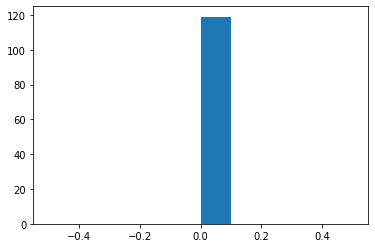

In [22]:
plt.hist(y)

# x,y값 변환
- 아래와 같은 에러 대처법
- Failed to convert a NumPy array to a Tensor (Unsupported object type float)

In [34]:
x=np.asarray(x).astype(np.float32)
y=np.asarray(y).astype(np.float32)

## 트레이닝 테스트 데이터 나누기

In [35]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)

# 문제_ 모델 제작

In [ ]:
###타이타닉 데이터의 x값은 (첫 layer의 input_shape임)
###타이타닉 데이터의 y값은 (최종 layer)
# 선형회귀, 출력값1, 활성화함수 없음
#이항분류,출력값 1 활성화함수 시그모이드
# 이항분류를 원핫인코딩시키면 출력값 2 활성화 함수 softmax
#다항분류는 원핫인코딩해서 해야함 출력값은 다항분류갯수 활성화함수 softmax

In [36]:
import tensorflow as tf
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(units=40, activation="relu", input_shape=(6,)),
                           tf.keras.layers. Dense(units=5, activation="relu"),
                           tf.keras.layers. Dense(units=1, activation="sigmoid")
])

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
              loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [38]:
model.summary()

#문제 Param의 출력된 갯수를 계산하여 보세요

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 40)                280       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 205       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [39]:
#다른 신경망 네트워크들과 비슷하게 훈련은 fit메소드를 통해 실행하며, 
# EarlyStopping이라는 callback 함수를 사용하여 val_loss가 3번 이상 연속으로 증가한다면 멈추고 
# 최저의 loss를 사용하도록 선언함

history = model.fit(x_train, y_train, epochs=25, batch_size=1, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])


Epoch 1/25
71/71 [==============================] - 3s 6ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/25
71/71 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/25
71/71 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/25
71/71 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000


<Figure size 864x288 with 0 Axes>

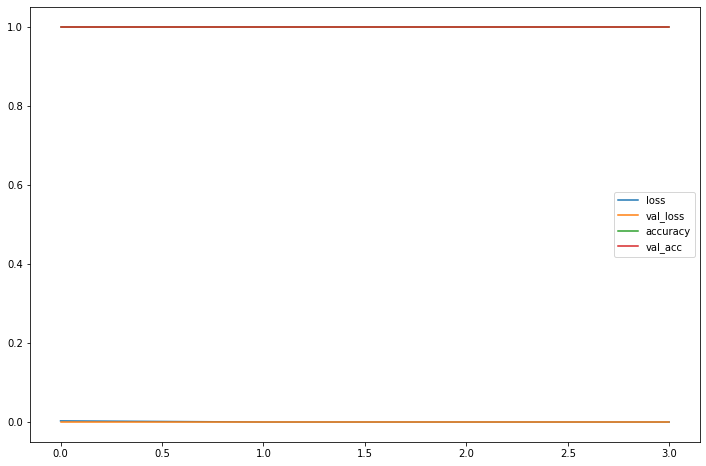

In [40]:
plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()


In [43]:
# # 모델 측정
# 손실값, 정확도
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]

In [44]:
# 모델 예측, 아래의 x0~x8의 데이터를 newX값으로 받아서 예측하여 봅니다.
x0_pclass=1
x3_sex=1
x4_age=20
x5_sibsp=3
x6_parch=2
x8_fare=2
newx=[[x0_pclass,x3_sex,x4_age,x5_sibsp,x6_parch,x8_fare]]
model.predict(newx)

array([[0.]], dtype=float32)

In [ ]:

# 타이타닉 h5모델로 저장

In [46]:
model.predict(x_test[0:1])

array([[0.]], dtype=float32)